In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [78]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df.shape

(891, 12)

In [80]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [81]:
df1 = df.drop(['Name','Ticket','Cabin'],axis = 1)

In [82]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


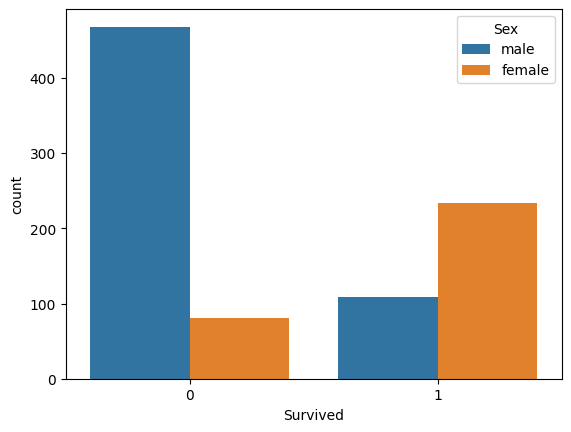

In [83]:
sns.countplot(x = 'Survived', hue = 'Sex', data= df1)
plt.show()

In [84]:
df1.groupby(['Survived'])['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

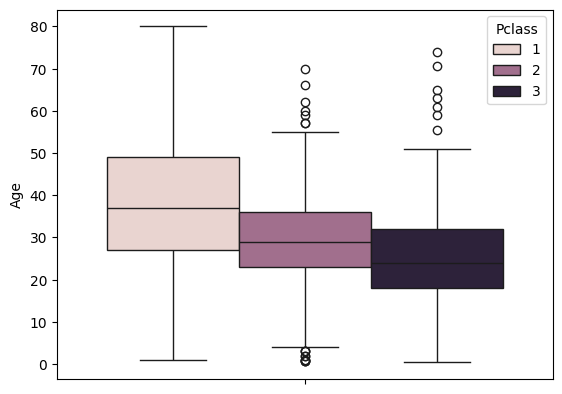

In [85]:
sns.boxplot(y = 'Age', hue = 'Pclass', data = df1)
plt.show()

In [86]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 28
    else:
      return 24
  else:
    return Age

In [87]:
df1['Age'] = df1[['Age','Pclass']].apply(impute_age,axis = 1)

/tmp/ipython-input-86-3461396709.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-86-3461396709.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [88]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [89]:
df1['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [90]:
df1['Embarked'].fillna(df['Embarked'].mode()[0],inplace= True)

/tmp/ipython-input-90-647399286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Embarked'].fillna(df['Embarked'].mode()[0],inplace= True)


In [91]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


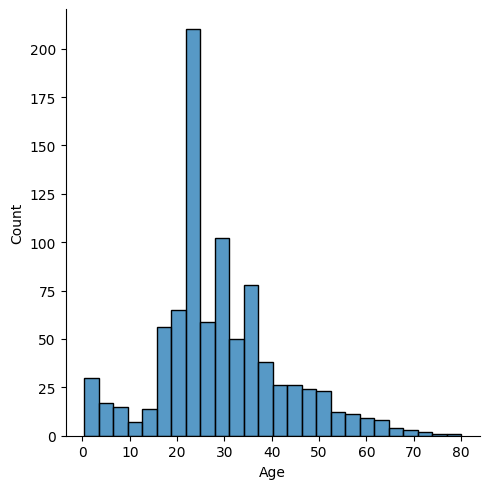

In [92]:
sns.displot(x = 'Age', data = df1)
plt.show()

In [93]:
df1['Age'].describe()

,Age
count,891.000000
mean,29.054063
std,13.245055
min,0.420000
25%,22.000000
50%,26.000000
75%,37.000000
max,80.000000


In [94]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## One hot Encoding

In [95]:
df1['Sex'].replace({'female': 1, 'male': 0}, inplace=True)

/tmp/ipython-input-95-2833115870.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Sex'].replace({'female': 1, 'male': 0}, inplace=True)
/tmp/ipython-input-95-2833115870.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Sex'].replace({'female': 1, 'male': 0}, inplace=True)


In [96]:

df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [97]:
df1['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [98]:
max = df1['Age'].mean() + 3* df1['Age'].std()
low = df1['Age'].mean() - 3* df1['Age'].std()
max,low

(np.float64(68.78922675058877), np.float64(-10.681101049129744))

In [99]:
df4 = df1[(df1.Age<max) & (df1.Age>low)]

In [100]:
df4.replace({'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


/tmp/ipython-input-100-2325194378.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4.replace({'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
/tmp/ipython-input-100-2325194378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.replace({'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x = df4.drop(['Survived'],axis = 'columns')
y = df4['Survived']

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 2)
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
10,11,3,1,4.0,1,1,16.7000,0
677,678,3,1,18.0,0,0,9.8417,0
779,780,1,1,43.0,0,1,211.3375,0
599,600,1,0,49.0,1,0,56.9292,1
159,160,3,0,24.0,8,2,69.5500,0
...,...,...,...,...,...,...,...,...
537,538,1,1,30.0,0,0,106.4250,1
587,588,1,0,60.0,1,1,79.2000,1
496,497,1,1,54.0,1,0,78.2667,1
530,531,2,1,2.0,1,1,26.0000,0


# Model Selection

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lr = LogisticRegression()

In [106]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
pred = lr.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.8022598870056498


In [109]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
ss = ShuffleSplit(test_size = 0.2)
cross_val_score(LogisticRegression(), x, y, cv = ss)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.78531073, 0.85310734, 0.76836158, 0.81920904, 0.8079096 ,
       0.82485876, 0.77966102, 0.79096045, 0.78531073, 0.79661017])

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [111]:
dt.fit(x_train, y_train)
pred1 = dt.predict(x_test)
print(accuracy_score(y_test,pred1))

0.768361581920904


In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
pred2 = dt.predict(x_test)
print(accuracy_score(y_test,pred2))

0.768361581920904


### For test Data

In [113]:
test_df = pd.read_csv('/content/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [114]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


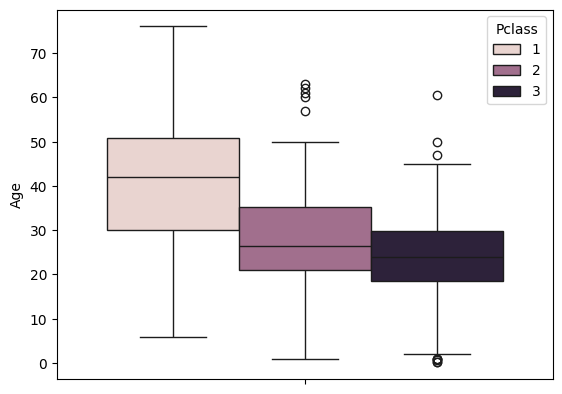

In [115]:
sns.boxplot(y = 'Age', hue = 'Pclass', data = test_df)
plt.show()

In [116]:
def impute_test_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 43
    elif Pclass == 2:
      return 25
    else:
      return 22
  else:
    return Age

In [117]:
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_test_age,axis = 1)

/tmp/ipython-input-116-407862081.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-116-407862081.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [118]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [119]:
test_df['Sex'].replace({'female': 1, 'male': 0}, inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)


/tmp/ipython-input-119-2486867152.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Sex'].replace({'female': 1, 'male': 0}, inplace=True)
/tmp/ipython-input-119-2486867152.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Sex'].replace({'female': 1, 'male': 0}, inplace=True)
/t

In [120]:
test_df1 = test_df.drop(['Name','Ticket','Cabin'],axis = 1)

In [121]:
test_df1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,22.0,0,0,8.0500,0
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,0
416,1308,3,0,22.0,0,0,8.0500,0


In [122]:
test_data = test_df1

In [123]:
pred = lr.predict(test_data)

In [124]:
# Create submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": pred.astype(int)  # ensure it's int (0 or 1)
})

# Save to CSV
submission.to_csv("submission.csv", index=False)
